In [1]:
import numpy as np
import soundfile as sf
from IPython.display import Audio
import matplotlib.pyplot as plt
%matplotlib inline


# PART 1

-  Fill the skeleton functions below with the correct code
-  Find the math functions for the square, triangular and sawtooth waves on the assignment pdf
-  Hint: some of this has been covered in class


### NOTE:
When selecting odd overtones make sure we process a correct amount of odd overtones corresponding to 'number_overtones' instead of stopping the function at the overtone count equal to 'number_overtones'. 

E.g. if we want 3 odd overtones, we need to stop the loop at overtone 7 (f0 + f3 + f5 + f7 ), Not at overtone 3 ( f0 + f3 ).

In [2]:
def sinewave(fs,duration,f0, phase):
    
    time_vector = np.arange(0, duration, 1/fs)
    signal = np.sin(2 * np.pi * f0 * time_vector  + phase)
    
    return time_vector, signal


In [3]:
def cosinewave(fs,duration,f0, phase):
    
    time_vector = np.arange(0, duration, 1/fs)
    signal = np.cos(2 * np.pi * f0 * time_vector  + phase)

    return time_vector, signal


In [4]:
def squarewave(fs,duration,f0,number_overtones, phase):
    
    time_vector = np.arange(0, duration, 1/fs)
    
    square_wave = np.zeros(duration*fs) #initialize
    
    anti_alias = 0
    
    for k in range(1,(number_overtones+1)*2,2):
        freq = 2*np.pi*f0*k
        square_wave = square_wave + 1/k * np.sin(freq*time_vector + phase)
        
    return time_vector, square_wave


In [5]:
def triangularwave(fs,duration,f0,number_overtones,phase):

    time_vector = np.arange(0, duration, 1/fs)
    
    triangle_wave = np.zeros(duration*fs) #initialize
    
    anti_alias = 0

    for k in range(1,(number_overtones+1)*2,2):
        freq = 2*np.pi*f0*k
        triangle_wave = triangle_wave + ((-1)**((k-1)/2)) *  1/(k**2) * np.sin(freq*time_vector + phase)
        
    return time_vector, triangle_wave 


In [6]:
def sawtoothwave(fs,duration,f0,number_overtones,phase):
    
    time_vector = np.arange(0, duration, 1/fs)
    
    saw_wave = np.zeros(duration*fs) #initialize

    anti_alias = 0

    for k in range(1,(number_overtones+1)):
        freq = 2*np.pi*f0*k
        saw_wave = saw_wave + 1/k * np.sin(freq*time_vector + phase)
            
    saw_wave = -saw_wave
        
    return time_vector, saw_wave


# PART 2

-  Use the functions above to plot and display audio for each waveform
-  Remember to plot against time (use the time_vector) and label the plot
-  Use plt.xlim to diplay only 2 periods of the waveform

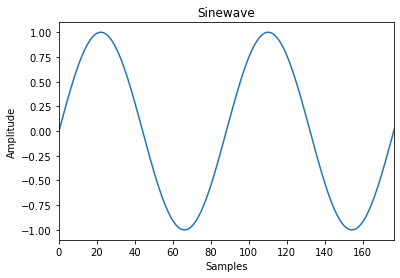

In [7]:
fs = 44100
f0 = 500 
duration = 1 # 1 second
phase = 0

# SINE
(time_vector, sine_1) = sinewave(fs,duration,f0, phase)

plt.plot(sine_1)
plt.ylabel('Amplitude')
plt.xlabel('Samples')
plt.title('Sinewave')
plt.xlim([0,(2*fs/f0)])

Audio(sine_1, rate = fs)



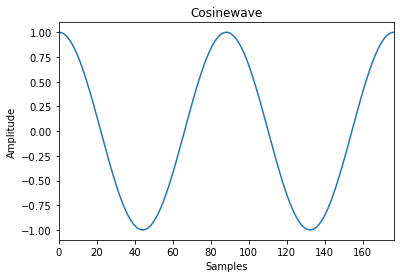

In [8]:
# COSINE
(time_vector, cos_1) = cosinewave(fs,duration,f0, phase)

plt.plot(cos_1)
plt.ylabel('Amplitude')
plt.xlabel('Samples')
plt.title('Cosinewave')
plt.xlim([0,(2*fs/f0)])

Audio(cos_1, rate = fs)



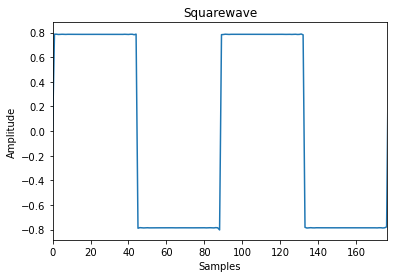

In [9]:
# SQUARE WAVE
number_overtones = 1000 # Number of Overtones. 

(time_vector, square_1) = squarewave(fs,duration,f0,number_overtones, phase)

plt.plot(square_1)
plt.ylabel('Amplitude')
plt.xlabel('Samples')
plt.title('Squarewave')
plt.xlim([0,(2*fs/f0)])

Audio(square_1, rate = fs)



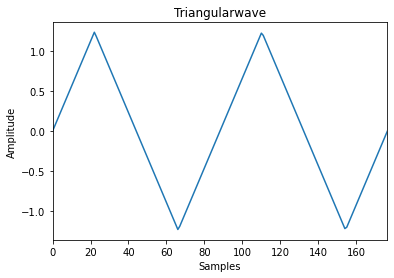

In [10]:
# TRIANGLE
(time_vector, triangle_1) = triangularwave(fs,duration,f0,number_overtones,phase)

plt.plot(triangle_1)
plt.ylabel('Amplitude')
plt.xlabel('Samples')
plt.title('Triangularwave')
plt.xlim([0,(2*fs/f0)])

Audio(triangle_1, rate = fs)



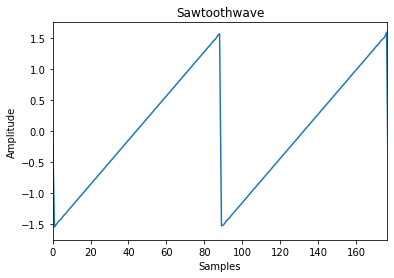

In [11]:
# SAWTOOTH
(time_vector, saw_1) = sawtoothwave(fs,duration,f0,number_overtones,phase)

plt.plot(saw_1)
plt.ylabel('Amplitude')
plt.xlabel('Samples')
plt.title('Sawtoothwave')
plt.xlim([0,(2*fs/f0)])

Audio(saw_1, rate = fs)


# Part 3

# Extra Credit - Noise Generator

- Fill the function, plot and display

In [12]:
def noise_gen(fs,duration):
    
    time_vector = np.arange(0, duration, 1/fs)

    values = 2* np.random.rand(len(time_vector)) - 1

    return time_vector, values



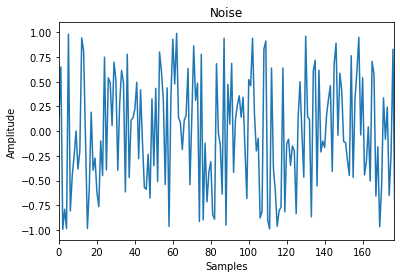

In [13]:
# NOISE
fs = 44100
duration = 1 # 1 sec

(time_vector, noise_1) = noise_gen (fs,duration)

plt.plot(noise_1)
plt.ylabel('Amplitude')
plt.xlabel('Samples')
plt.title('Noise')
plt.xlim([0,(2*fs/f0)])

Audio(noise_1, rate = fs)



## Unit Test (for graders -- do not edit or delete) 

In [14]:
time_vector, sine_test = sinewave(4,1,1,0)
assert np.allclose(sine_test, np.array([0, 1, 0, -1]))
assert np.allclose(time_vector, np.array([0, 0.25, 0.5, 0.75] ))

print('Sinewave OK!')

Sinewave OK!


In [15]:
time_vector, cosine_test = cosinewave(4,1,1,0)
assert np.allclose(cosine_test, np.array([1, 0, -1, 0]))
assert np.allclose(time_vector, np.array([0, 0.25, 0.5, 0.75] ))

print('Cosinewave OK!')

Cosinewave OK!


In [16]:
time_vector, squarewave_test = squarewave(4, 1, 1, 10, 0)
squarewave_test = squarewave_test/np.max(np.abs(squarewave_test))
assert np.allclose(squarewave_test, np.array([0, 1, 0, -1]))
assert np.allclose(time_vector, np.array([0, 0.25, 0.5, 0.75] ))

print('Squarewave OK!')

Squarewave OK!


In [17]:
time_vector, triangularwave_test = triangularwave(4, 1, 1, 10, 0)
triangularwave_test = triangularwave_test/np.max(np.abs(triangularwave_test))
assert np.allclose(triangularwave_test, np.array([0, 1, 0, -1]))
assert np.allclose(time_vector, np.array([0, 0.25, 0.5, 0.75] ))

print('Triang OK!')

Triang OK!


In [18]:
time_vector, sawtoothwave_test = sawtoothwave(4, 1, 1, 10, 0)
sawtoothwave_test = sawtoothwave_test/np.max(np.abs(sawtoothwave_test))
assert np.allclose(sawtoothwave_test, np.array([0, -1, 0, 1]))
assert np.allclose(time_vector, np.array([0, 0.25, 0.5, 0.75] ))

print('Sawtooth OK!')

Sawtooth OK!
